# Citation Analysis

This notebook counts the citations for the top pathologies and plot the frequency

In [1]:
import logging
import os
import sys
import time

import matplotlib.pyplot as plt

import pybel
from pybel_tools.utils import barh, barv

from collections import Counter, defaultdict
from typing import Any, Iterable, List, Mapping, Optional, Set, Tuple, Union
from pybel.constants import CITATION
from pybel.dsl import BaseEntity
import pybel_tools

import heme_knowledge

In [2]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [3]:
logging.basicConfig(level=20)

### Notebook Provenance

The explicit display of time of execution and the versions of the software packages used.

In [4]:
sys.version

'3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]'

In [5]:
time.asctime()

'Sun May 19 22:56:33 2019'

In [6]:
pybel.get_version()

'0.13.2'

# Heme Knowledge Assembly

## Loading

The compilation of the BEL scripts and allows to explore the resultant heme knowledge assembly model.

In [7]:
merged_network = heme_knowledge.get_graph()

### Content Summary

A summary of the types of nodes and edges present in the heme knowledge model.

In [8]:
merged_network.summarize()

Heme Curation v0.0.1-dev
Number of Nodes: 784
Number of Edges: 3016
Number of Citations: 46
Number of Authors: 330
Network Density: 4.91E-03
Number of Components: 12
Number of Warnings: 0


The pubmid identifiers for the articles selected for the contruction of heme knowledge assembly model.

In [9]:
pubmed_identifiers = pybel.struct.summary.get_pubmed_identifiers(merged_network)
pubmed_identifiers

{'19276082',
 '20378845',
 '22954673',
 '23215741',
 '24464629',
 '24486321',
 '24489717',
 '24553061',
 '24630724',
 '24667910',
 '24904418',
 '25264713',
 '25301065',
 '25307023',
 '25411909',
 '26202471',
 '26337933',
 '26368565',
 '26475040',
 '26675351',
 '26794659',
 '26875449',
 '26974230',
 '27125525',
 '27308950',
 '27515135',
 '27798618',
 '28088643',
 '28143953',
 '28314763',
 '28400318',
 '28458720',
 '28716864',
 '29212341',
 '29351418',
 '29522519',
 '29544683',
 '29603246',
 '29610666',
 '29694434',
 '29929138',
 '29956069',
 '30248094',
 '30281034',
 '30324533',
 '30505280'}

### Get the frequency of papers for the top 10 pathology nodes

The frequency of papers for the top ten pathologies in the heme knowledge model by first extracting the top pathologies and then get the pubmed count on the basis of number of edges that are evidenced for each pathology node.

In [10]:
path_nodes = pybel.struct.summary.get_top_pathologies(merged_network, 10)  #get the top 10 pathology nodes in the heme_graph 
path_nodes

[(<BEL path(MESH:Hemolysis)>, 205),
 (<BEL path(MESH:Thrombosis)>, 122),
 (<BEL path(MESH:Inflammation)>, 94),
 (<BEL path(MESH:"Porphyria, Erythropoietic")>, 66),
 (<BEL path(MESH:Anemia)>, 44),
 (<BEL path(HM:"vaso-occlusive crisis")>, 34),
 (<BEL path(MESH:Hematoma)>, 32),
 (<BEL path(HP:"Paroxysmal nocturnal hemoglobinuria")>, 29),
 (<BEL path(MESH:"Disseminated Intravascular Coagulation")>, 23),
 (<BEL path(MESH:"Vascular System Injuries")>, 21)]

##### Pmids and plot for the Hemolysis

Counter({'29956069': 52, '25307023': 40, '29929138': 13, '24904418': 12, '27125525': 11, '19276082': 8, '29694434': 8, '26875449': 8, '29603246': 6, '26794659': 6, '27515135': 4, '26475040': 4, '25264713': 4, '26337933': 4, '30248094': 4, '27308950': 3, '28458720': 3, '24486321': 2, '26974230': 2, '28088643': 2, '30505280': 2, '24464629': 2, '24553061': 2, '26202471': 2, '29544683': 1})


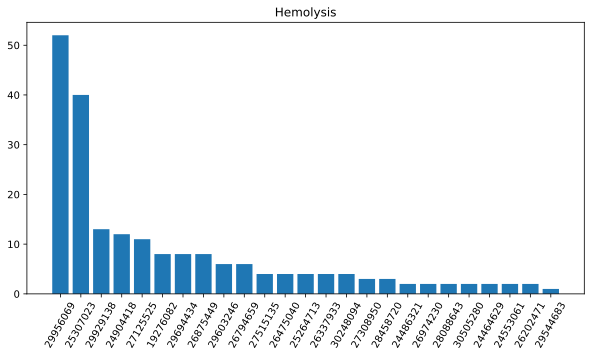

In [11]:
for node in merged_network:
     if 'name' in node and node.name == 'Hemolysis':
        hemolysis_node = node

def get_node_citations(graph, node):
    """Get a mapping from all nodes incident to the given node to their shared edges' citations."""
    rv = defaultdict(list)
    for t, citation in _iter_node_citations(graph, node):
        rv[t].append(citation)
    return dict(rv)
def _iter_node_citations(graph, node):
    for u, _, data in graph.in_edges(node, data=True):
        if CITATION in data:
            yield u, data[CITATION]
    for _, v, data in graph.out_edges(node, data=True):
        if CITATION in data:
            yield v, data[CITATION]
            
hemolysis_citation = get_node_citations(merged_network, hemolysis_node)

#print(hemolysis_citation)

pubmeds = [] #creating an empty list to take the refernce key, value and run an counter on it

for node, data in hemolysis_citation.items():
    
    for dictionary in data:
        pubmeds.append(dictionary['reference']) #get the refernce key, value

hemolysis_set = set(pubmeds) # get the set of hemolysis pubmeds
hemolysis_count = Counter(pubmeds)   #count the elements in list and are stored as dict with keys and their count as values 
print(hemolysis_count)
#print(len(pubmeds))

plt.figure(figsize=(10, 5))
barv(hemolysis_count, plt, 'Hemolysis', rotation=60)
plt.savefig('D:/ThesisLatex_Farah/img/Hemolysis.png', dpi=300, bbox_inches='tight')

##### Pmids and plot for the Erythropoietic protoporphyria

Counter({'28143953': 66})


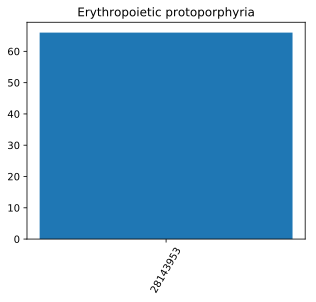

In [12]:
for node in merged_network:
     if 'name' in node and node.name == 'Porphyria, Erythropoietic':
        p_eryth_node = node

def get_node_citations(graph, node):
    rv = defaultdict(list)
    for t, citation in _iter_node_citations(graph, node):
        rv[t].append(citation)
    return dict(rv)

p_eryth_citation = get_node_citations(merged_network, p_eryth_node)

#p_eryth_citation

pubmeds = []

for node, data in p_eryth_citation.items():
    
    for dictionary in data:
        pubmeds.append(dictionary['reference'])

p_erythropoietic = (Counter(pubmeds))
print(p_erythropoietic)
len(pubmeds)

plt.figure(figsize=(5, 4))
barv(p_erythropoietic, plt, 'Erythropoietic protoporphyria', rotation=60)
plt.savefig('D:/ThesisLatex_Farah/img/Erythropoietic_protoporphyria.png', dpi=300, bbox_inches='tight')

##### Pmids and plot for the Thrombosis

Counter({'25307023': 59, '28458720': 22, '29603246': 16, '29929138': 10, '29956069': 5, '19276082': 4, '29694434': 4, '24904418': 2})


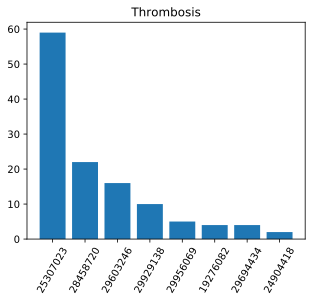

In [13]:
for node in merged_network:
     if 'name' in node and node.name == 'Thrombosis':
        throm_node = node

def get_node_citations(graph, node):
    rv = defaultdict(list)
    for t, citation in _iter_node_citations(graph, node):
        rv[t].append(citation)
    return dict(rv)

throm_citation = get_node_citations(merged_network, throm_node)

pubmeds = []

for node, data in throm_citation.items():
    
    for dictionary in data:
        pubmeds.append(dictionary['reference'])
        
thrombosis_set = set(pubmeds)
throm_count = (Counter(pubmeds))
print(throm_count)
len(pubmeds)

plt.figure(figsize=(5, 4))
barv(throm_count, plt, 'Thrombosis', rotation=60)
plt.savefig('D:/ThesisLatex_Farah/img/Thrombosis.png', dpi=300, bbox_inches='tight')

##### Pmids and plot for Anemia

Counter({'29351418': 32, '25411909': 6, '28143953': 4, '29956069': 2})


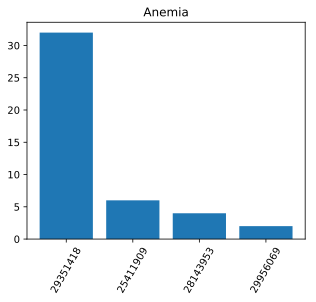

In [14]:
for node in merged_network:
    if 'name' in node and node.name == 'Anemia':
        anemia_node = node
        
def get_node_citations(graph, node):
    rv = defaultdict(list)
    for t, citation in _iter_node_citations(graph, node):
        rv[t].append(citation)
    return dict(rv)

anemia_citation = get_node_citations(merged_network, anemia_node)

pubmeds = []

for node, data in anemia_citation.items():
    
    for dictionary in data:
        pubmeds.append(dictionary['reference'])
        
anemia_count = Counter(pubmeds)
print(anemia_count)
len(pubmeds)

plt.figure(figsize=(5, 4))
barv(anemia_count, plt, 'Anemia', rotation=60)
plt.savefig('D:/ThesisLatex_Farah/img/Anemia.png', dpi=300, bbox_inches='tight')

##### Pmids and plot for Hematoma

Counter({'27125525': 28, '20378845': 4})


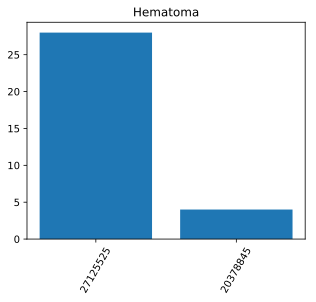

In [15]:
for node in merged_network:
    if 'name' in node and node.name == 'Hematoma':
        hematoma_node = node
        
def get_node_citations(graph, node):
    rv = defaultdict(list)
    for t, citation in _iter_node_citations(graph, node):
        rv[t].append(citation)
    return dict(rv)

hematoma_citation = get_node_citations(merged_network, hematoma_node)

pubmed = []

for node, data in hematoma_citation.items():
    
    for dictionary in data:
        pubmed.append(dictionary['reference'])
        
hematoma_count = Counter(pubmed)
print(hematoma_count)
len(pubmed)

plt.figure(figsize=(5, 4))
barv(hematoma_count, plt, 'Hematoma', rotation=60)
plt.savefig('D:/ThesisLatex_Farah/img/Hematoma.png', dpi=300, bbox_inches='tight')

##### Pmids and plot for Vaso-occlusive crisis

Counter({'29694434': 22, '24904418': 4, '26875449': 3, '24486321': 2, '28314763': 1, '29956069': 1, '28458720': 1})


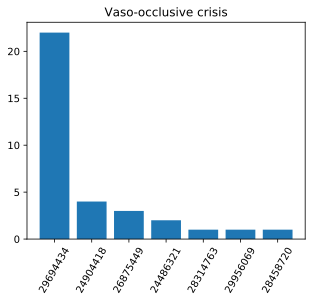

In [16]:
for node in merged_network:
    if 'name' in node and node.name == 'vaso-occlusive crisis':
        vaso_node = node
        
def get_node_citations(graph, node):
    rv = defaultdict(list)
    for t, citation in _iter_node_citations(graph, node):
        rv[t].append(citation)
    return dict(rv)

vaso_citation = get_node_citations(merged_network, vaso_node) #returns a dict with node as key and data as value which is a list of dictionaries

#vaso_citation  

pubmeds = []

for node, data in vaso_citation.items():
    
    for dictionary in data:
        pubmeds.append(dictionary['reference'])
        
vaso_count = (Counter(pubmeds))
print(vaso_count)
len(pubmeds)

plt.figure(figsize=(5, 4))
barv(vaso_count, plt, 'Vaso-occlusive crisis', rotation=60)
plt.savefig('D:/ThesisLatex_Farah/img/Vaso_occlusive_crisis.png', dpi=300, bbox_inches='tight')

##### Pmids and plot for Paroxysmal nocturnal hemoglobinuria

Counter({'29929138': 12, '25307023': 8, '29956069': 7, '26875449': 2})


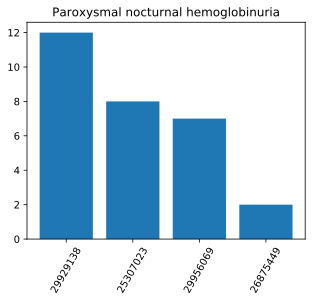

In [17]:
for node in merged_network:
    if 'name' in node and node.name == 'Paroxysmal nocturnal hemoglobinuria':
        paroxy_node = node
        
def get_node_citations(graph, node):
    rv = defaultdict(list)
    for t, citation in _iter_node_citations(graph, node):
        rv[t].append(citation)
    return dict(rv)


paroxy_citation = get_node_citations(merged_network, paroxy_node)

pubmeds = []

for node, data in paroxy_citation.items():
    
    for dictionary in data:
        pubmeds.append(dictionary['reference'])
        
paroxy_count = (Counter(pubmeds))
print(paroxy_count)
len(pubmeds)


plt.figure(figsize=(5, 4))
barv(paroxy_count, plt, 'Paroxysmal nocturnal hemoglobinuria', rotation=60)
plt.savefig('D:/ThesisLatex_Farah/img/Paroxysmal_nocturnal_hemoglobinuria.png', dpi=300, bbox_inches='tight')

##### Pmids and plot for Disseminated Intravascular Coagulation

Counter({'29956069': 17, '25307023': 6})


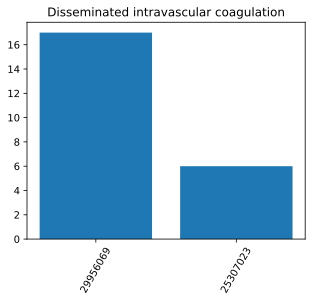

In [18]:
for node in merged_network:
    if 'name' in node and node.name == 'Disseminated Intravascular Coagulation':
        dicoag_node = node
        
def get_node_citations(graph, node):
    rv = defaultdict(list)
    for t, citation in _iter_node_citations(graph, node):
        rv[t].append(citation)
    return dict(rv)

dicoag_citation = get_node_citations(merged_network, dicoag_node)

pubmeds = []

for node, data in dicoag_citation.items():
    
    for dictionary in data:
        pubmeds.append(dictionary['reference'])
        
dicoag_count = Counter(pubmeds)
print(dicoag_count)
len(pubmeds)

plt.figure(figsize=(5, 4))
barv(dicoag_count, plt, 'Disseminated intravascular coagulation', rotation=60)
plt.savefig('D:/ThesisLatex_Farah/img/Disseminated_intravascular_coagulation.png', dpi=300, bbox_inches='tight')

##### Pmids and plot for Sepsis

Counter({'29956069': 19, '29544683': 2})


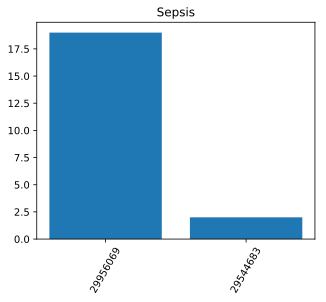

In [19]:
for node in merged_network:
    if 'name' in node and node.name == 'Sepsis':
        sepsis_node = node
        
def get_node_citations(graph, node):
    rv = defaultdict(list)
    for t, citation in _iter_node_citations(graph, node):
        rv[t].append(citation)
    return dict(rv)

sepsis_citation = get_node_citations(merged_network, sepsis_node)

pubmeds = []

for node, data in sepsis_citation.items():
    
    for dictionary in data:
        pubmeds.append(dictionary['reference'])
        
sepsis_count = Counter(pubmeds)
print(sepsis_count)
len(pubmeds)

plt.figure(figsize=(5, 4))
barv(sepsis_count, plt, 'Sepsis', rotation=60)
plt.savefig('D:/ThesisLatex_Farah/img/Sepsis.png', dpi=300, bbox_inches='tight')

##### Pmids and plot for the Inflammation

Counter({'24464629': 13, '25307023': 13, '29603246': 10, '24904418': 9, '29956069': 8, '26202471': 4, '29694434': 4, '24486321': 4, '26675351': 4, '28458720': 3, '28716864': 3, '29929138': 3, '20378845': 2, '26974230': 2, '26794659': 2, '26875449': 2, '27515135': 2, '30324533': 2, '28314763': 1, '26475040': 1, '30281034': 1, '29544683': 1})


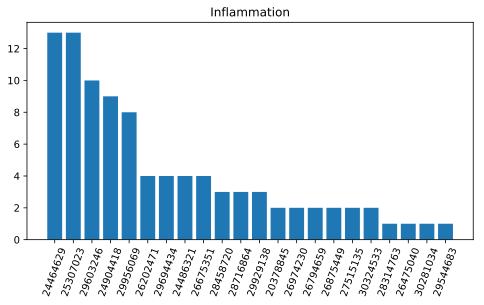

In [20]:
for node in merged_network: 
    if 'name' in node and node.name == 'Inflammation':
        inflam_node = node

def get_node_citations(graph, node):
    rv = defaultdict(list)
    for t, citation in _iter_node_citations(graph, node):
        rv[t].append(citation)
    return dict(rv)

inflam_citation = get_node_citations(merged_network, inflam_node)


pubmed = []

for node, data in inflam_citation.items():
    
    for dictionary in data:
        pubmed.append(dictionary['reference'])

inflam_set = set(pubmed)
inflam_count = (Counter(pubmed))
print(inflam_count)
len(pubmed)

plt.figure(figsize=(8, 4))
barv(inflam_count, plt, 'Inflammation', rotation=70)
plt.savefig('D:/ThesisLatex_Farah/img/Inflammation.png', dpi=300, bbox_inches='tight')

##### Pmids and plot for Vascular System Injuries

Counter({'19276082': 14, '24486321': 2, '26475040': 2, '27308950': 2, '26875449': 1})


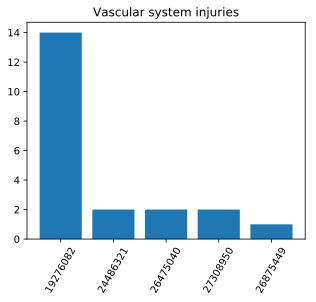

In [21]:
for node in merged_network: 
    if 'name' in node and node.name == 'Vascular System Injuries':
        vsi_node = node

def get_node_citations(graph, node):
    rv = defaultdict(list)
    for t, citation in _iter_node_citations(graph, node):
        rv[t].append(citation)
    return dict(rv)

vsi_citation = get_node_citations(merged_network, vsi_node)

pubmed = []

for node, data in vsi_citation.items():
    
    for dictionary in data:
        pubmed.append(dictionary['reference'])

vsi_count = (Counter(pubmed))
print(vsi_count)
len(pubmed)

plt.figure(figsize=(5, 4))
barv(vsi_count, plt, 'Vascular system injuries', rotation=60)
plt.savefig('D:/ThesisLatex_Farah/img/Vascular_System_Injuries.png', dpi=300, bbox_inches='tight')

### Get the common pubmeds between Hemolysis, Thrombosis and Inflammation

The common pubmeds that occur in combination between Hemolysis and Thrombosis, Thrombosis and Inflammation, Inflammation and Hemolysis and common between all three of them.

###### Hemolysis and Thrombosis

In [22]:
hemo_thrombo = hemolysis_set.intersection(thrombosis_set)
hemo_thrombo

{'19276082',
 '24904418',
 '25307023',
 '28458720',
 '29603246',
 '29694434',
 '29929138',
 '29956069'}

###### Hemolysis and Inflammation

In [23]:
hemo_inflam = hemolysis_set.intersection(inflam_set)
hemo_inflam

{'24464629',
 '24486321',
 '24904418',
 '25307023',
 '26202471',
 '26475040',
 '26794659',
 '26875449',
 '26974230',
 '27515135',
 '28458720',
 '29544683',
 '29603246',
 '29694434',
 '29929138',
 '29956069'}

##### Thrombosis and Inflammation

In [24]:
thrombo_inflam = thrombosis_set. intersection(inflam_set)
thrombo_inflam

{'24904418',
 '25307023',
 '28458720',
 '29603246',
 '29694434',
 '29929138',
 '29956069'}

##### Hemolysis, Thrombosis and Inflammation

In [25]:
int_all = hemolysis_set. intersection(thrombosis_set, inflam_set)
int_all

{'24904418',
 '25307023',
 '28458720',
 '29603246',
 '29694434',
 '29929138',
 '29956069'}